# Insights from Stack Overflow Developer Survey 2023

**Summary:**

> In this notebook, we will delve into the Stack Overflow Developer Survey 2023 data to uncover valuable insights about the developer community. We will explore **demographics**, **popular technologies**, **career trends**, and **work preferences** among developers. Our analysis will leverage Python's powerful data manipulation and visualization libraries, including pandas, numpy, matplotlib, and seaborn.

**Scope:**

This analysis aims to provide a comprehensive overview of key trends and patterns within the developer community. We will:

 * Examine the demographic profiles of survey respondents.
 * Identify the most popular programming languages and tools.
 * Analyze salary distributions and factors influencing compensation.
 * Explore work preferences and professional development trends.

**Note :** This notebook is designed to be extendable, allowing for the addition of further insights and analyses as needed. Future additions might include deeper dives into specific subgroups, sentiment analysis of open-ended responses, and predictive modeling of career outcomes.

**Data Sources:**

* [Stack Overflow Developer Survey 2023 Results](https://survey.stackoverflow.co/): The primary dataset for this analysis, which includes responses from developers worldwide.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Loading data
survey_schema_raw = pd.read_csv('dataset/survey_results_schema.csv')
survey_responses_raw = pd.read_csv('dataset/survey_results_public.csv')

In [3]:
survey_schema_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   qid         78 non-null     object
 1   qname       78 non-null     object
 2   question    78 non-null     object
 3   force_resp  67 non-null     object
 4   type        78 non-null     object
 5   selector    78 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [4]:
survey_schema_raw.head(30)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


In [5]:
survey_schema_raw.loc[2].question

'<div><span style="font-size:19px;"><strong>You consent to providing your information to help us stay privacy compliant</strong></span></div>\n\n<div> </div>\n\n<div>Your participation in this survey is completely anonymous.  As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file.  The information gathered via this survey is made available to the public in the spirit of community which Stack Overflow was founded and to serve as a resource for everyone who codes. </div><div><br></div><div>By selecting "I agree" and submitting this survey, you acknowledge that you voluntarily consent to your anonymous answers being made publicly available.\n</div>'

In [6]:
survey_responses_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [7]:
survey_responses_raw.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [8]:
# Extracting question(s) text from raw schema
survey_questions = pd.read_csv('dataset/survey_results_schema.csv', index_col='qname').question

In [9]:
survey_questions.head(10)

qname
S0                  <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                            Browser Meta Info
Q310                <div><span style="font-size:19px;"><strong>You...
Q120                                                                 
S1                  <span style="font-size:22px; font-family: aria...
MainBranch          Which of the following options best describes ...
Age                                               What is your age? *
Employment          Which of the following best describes your cur...
RemoteWork          Which best describes your current work situation?
CodingActivities    Which of the following best describes the code...
Name: question, dtype: object

In [11]:
survey_questions['CodingActivities']

'Which of the following best describes the code you write outside of work? Select all that apply.'

In [13]:
survey_responses_raw['CodingActivities'].head()

0                                                  NaN
1    Hobby;Contribute to open-source projects;Boots...
2    Hobby;Professional development or self-paced l...
3                                                Hobby
4    Hobby;Contribute to open-source projects;Profe...
Name: CodingActivities, dtype: object

In [14]:
# Let's analyze our respondent's coding activities

# Step 1: Break down the `CodingActivities` column into multiple columns (by creating a new dataframe).

# Step 2: Visualize different columns using a Pie-chart.

In [15]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [19]:
id(survey_responses_raw['CodingActivities'])

6054153872

In [23]:
split_multicolumn(survey_responses_raw['CodingActivities'])

,Hobby,Contribute to open-source projects,Bootstrapping a business,Professional development or self-paced learning from online courses,I don’t code outside of work,Freelance/contract work,School or academic work,Other (please specify):
0,False,False,False,False,False,False,False,False
1,True,True,True,True,False,False,False,False
2,True,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
89179,True,False,True,False,False,True,False,False
89180,False,False,False,False,False,False,True,False
89181,False,False,False,False,False,False,False,False
89182,True,False,False,False,False,False,True,False


<Axes: title={'center': 'Which of the following best describes the code you write outside of work? Select all that apply.'}>

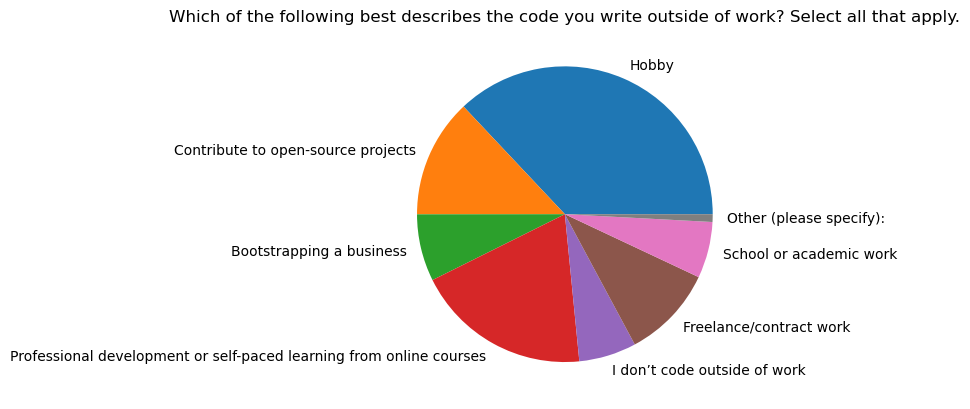

In [26]:
split_multicolumn(survey_responses_raw['CodingActivities']).sum().plot(kind='pie', title=survey_questions['CodingActivities'])

---

In [28]:
# Let's analyze our respondent's current work situation (remote vs hybrid vs in-person)

# Step 1: Break down the `RemoteWork` column into multiple columns (by creating a new dataframe).

# Step 2: Visualize different columns using a Pie-chart.

In [30]:
survey_questions['RemoteWork']

'Which best describes your current work situation?'

In [34]:
survey_responses_raw['RemoteWork'].head(10)

0                                     NaN
1                                  Remote
2    Hybrid (some remote, some in-person)
3    Hybrid (some remote, some in-person)
4                                  Remote
5                                  Remote
6                                  Remote
7                                  Remote
8    Hybrid (some remote, some in-person)
9                                     NaN
Name: RemoteWork, dtype: object

<Axes: title={'center': 'Which best describes your current work situation?'}, ylabel='count'>

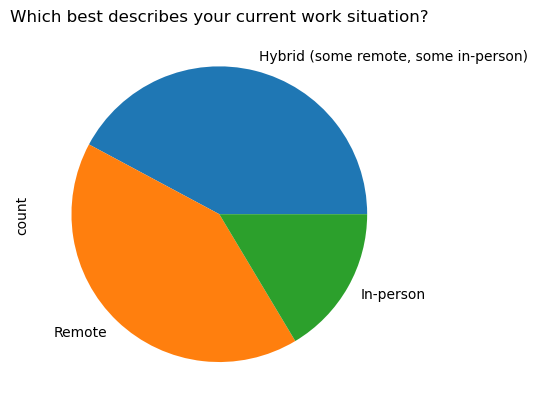

In [40]:
survey_responses_raw['RemoteWork'].value_counts(dropna=True).plot(kind='pie', title=survey_questions['RemoteWork'])